### Probability Distribution

Probability distribution is a mathematical `function` that describes the probabilities for all outcomes of random variable.   
Random `variables` are characteristics that you can observe, but you don't control them.  

In [119]:
from random import choices

# Define the probability distribution of a six-sided die
D = {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

# Simulate rolling the die
outcomes, probabilities = zip(*D.items())
outcome = choices(outcomes)[0]
print(f"You rolled a {outcome}!")

print(f"{'Outcome':<10} Probability")
print("-" * 20)

# Output the probability of each outcome
for outcome, p in D.items():
    print(f"{outcome:<10} {p:.2f}")

You rolled a 5!
Outcome    Probability
--------------------
1          0.17
2          0.17
3          0.17
4          0.17
5          0.17
6          0.17


### Histograms

In histograms we are displaying the `properties` of distributions (shape, center, spread).   
Probability distributions are similar, except that the `focus` is on probabilities of the outcomes.  

Histograms represent samples while probability distributions describe `populations`.  
Histogram represents the `frequency` of occurrence of data points in consecutive, non-overlapping intervals.  

Probability Distribution (KDE) `stands` for Kernel Density Estimate.  
It's a way to estimate the probability density function of a `continuous` random variable. 

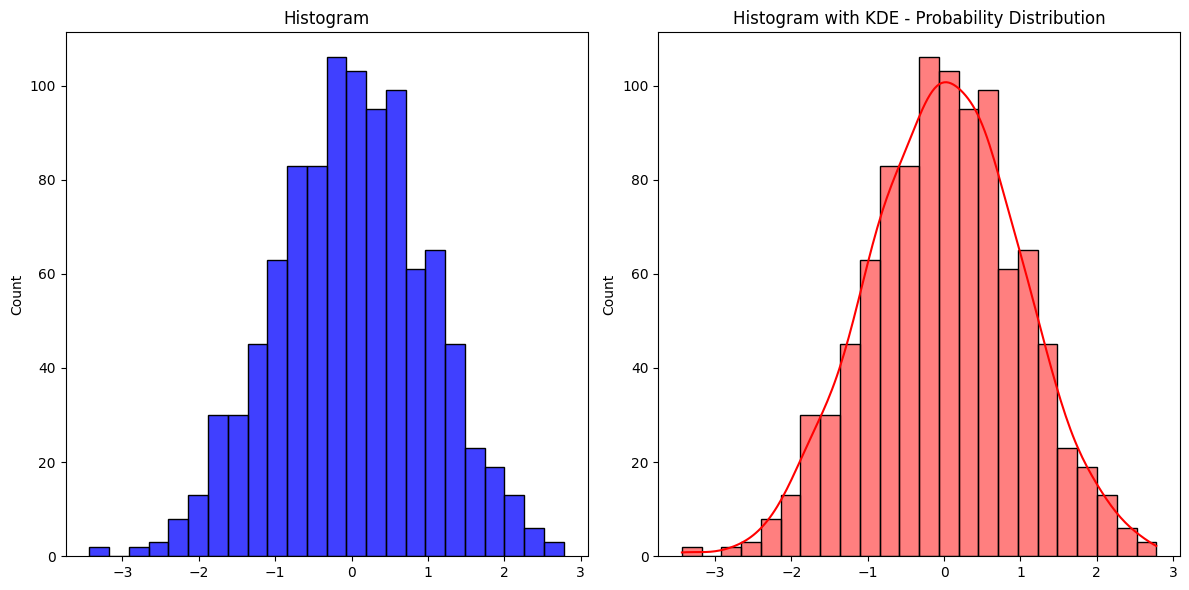

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generating random data
data = np.random.normal(loc=0, scale=1, size=1000)

# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(data, kde=False, ax=axs[0], color='blue')
axs[0].set_title('Histogram')

# KDE Plot (Probability Distribution)
sns.histplot(data, kde=True, ax=axs[1], color='red')
axs[1].set_title('Histogram with KDE - Probability Distribution')

plt.tight_layout()
plt.show()


### Discrete Probability Distributions

Discrete probability functions have only `distinct` values.  
For `example`, coin tosses and counts of events are discrete functions, there are no in-between values.  

In [39]:
# Household Car Ownership / Hypothetical probabilities
counts = ['0 cars', '1 car', '2 cars', '3+ cars']
probabilities = [0.1, 0.4, 0.3, 0.2]  

print(f"{'Outcome':<10} Probability")
print("-" * 27)

# Output the table
for count, p in zip(counts, probabilities):
    print(f"{count:<10} Probability {p:.2f}")


Outcome    Probability
---------------------------
0 cars     Probability 0.10
1 car      Probability 0.40
2 cars     Probability 0.30
3+ cars    Probability 0.20


### Binominal Distributions

Binary distributions occur when you can place an observation into only `two` categories.  
For example, when a `customer` enter a store, there two possible outcomes, sale or no sale.  
Use binonimal distribution to calculate probability of X `events` happening within N trials.  

Assume we're playing a `game` where rolling a 6 is very advantageous.  
In this scenario, rolling a 6 is `binary` because an observation can be either 6 or not a 6.   

Suppose you want to determine how likely is to roll 6s on a die when you roll it `ten` times.  
The graph displays the probability of rolling 6 `each` number of times when you roll the die ten times.   

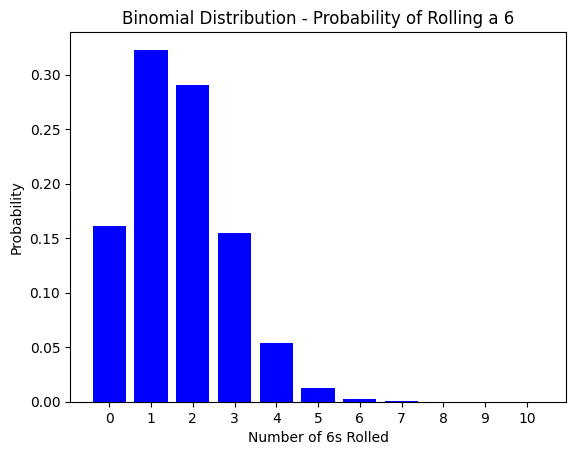


The highest probability is (0.32) corresponding with 1 6s.
There is a 32.30% chance of rolling a 6 exactly 1 time(s) in 10 rolls.
There is a 16.14% chance of rolling no 6s.



In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define the parameters for the binomial distribution
p = 0.1667  # The probability of rolling a 6 on a die (1/6)
n = 10      # The number of trials (rolling a die 10 times)

# Calculate the probability of getting each possible number of 6's (from 0 to 10)
x = np.arange(0, n+1)               # Possible numbers of successes (0 through 10)
probabilities = binom.pmf(x, n, p)  # pmf is the probability mass function for the binomial distribution

# Plotting the binomial distribution
plt.bar(x, probabilities, color='blue')
plt.title('Binomial Distribution - Probability of Rolling a 6')
plt.xlabel('Number of 6s Rolled')
plt.ylabel('Probability')
plt.xticks(x)
plt.show()

# Display the binomial distribution
print(f"""
The highest probability is ({max(probabilities):.2f}) corresponding with {np.argmax(probabilities)} 6s.
There is a {probabilities[1]:.2%} chance of rolling a 6 exactly {np.argmax(probabilities)} time(s) in 10 rolls.
There is a {probabilities[0]:.2%} chance of rolling no 6s.
""")
